Importing the required libraries


In [1]:
#For EDA and data preprocessing part
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
#for model building using NN
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

Data collection and preprocessing

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
df=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Adding the 'Target' to the dataframe

In [5]:
df['Target'] = breast_cancer_dataset.target

In [6]:
df.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902,0


Shape of the dataset

In [7]:
df.shape

(569, 31)

Information about the data and datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Statistical detail about the dataset

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Checking the null value

In [10]:
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


Checking duplicate values in dataset

In [11]:
df.duplicated().sum()

np.int64(0)

Checking how many unique classes into Target

In [12]:
df['Target'].unique()

array([0, 1])

Checking the distribution of Target class

In [13]:
df['Target'].value_counts()

,count
Target,
1,357
0,212


Calculating the average of each Target variable class

In [14]:
df.groupby('Target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
Target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Dividing the dataset into x(feature) and Target(y)

In [15]:
x=df.drop(columns='Target',axis=1)
y=df['Target']

In [16]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [17]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


Splitting the data into training and testing

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

Current shape of Features and Target class data after split


In [19]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(569, 30) (455, 30) (114, 30)
(569,) (455,) (114,)


standarization of data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 1.40381088,  1.79283426,  1.37960065, ...,  1.044121  ,
         0.52295995,  0.64990763],
       [ 1.16565505, -0.14461158,  1.07121375, ...,  0.5940779 ,
         0.44153782, -0.85281516],
       [-0.0307278 , -0.77271123, -0.09822185, ..., -0.64047556,
        -0.31161687, -0.69292805],
       ...,
       [ 1.06478904,  0.20084323,  0.89267396, ...,  0.01694621,
         3.06583565, -1.29952679],
       [ 1.51308238,  2.3170559 ,  1.67987211, ...,  1.14728703,
        -0.16599653,  0.82816016],
       [-0.73678981, -1.02636686, -0.74380549, ..., -0.31826862,
        -0.40713129, -0.38233653]])

**Creating a NN network to predict the output**

In [21]:
#Random set generation
tf.random.set_seed(3)

In [22]:
#Setting up layers of NN
model=keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(30,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the NN

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Training the NN

In [24]:
H=model.fit(x_train,y_train,validation_split=0.1,epochs=20)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5694 - loss: 0.6407 - val_accuracy: 0.8261 - val_loss: 0.4730
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8645 - loss: 0.4051 - val_accuracy: 0.8696 - val_loss: 0.3465
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9241 - loss: 0.2847 - val_accuracy: 0.9130 - val_loss: 0.2730
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9493 - loss: 0.2229 - val_accuracy: 0.9130 - val_loss: 0.2265
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9540 - loss: 0.1874 - val_accuracy: 0.9130 - val_loss: 0.1939
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9540 - loss: 0.1644 - val_accuracy: 0.9348 - val_loss: 0.1700
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9573 - loss: 0.1476 - val_accuracy: 0.9348 - val_loss: 0.1516
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9639 - loss: 0.1346 - val_accuracy: 0.9348 - v

Visualization(Acc vs loss)

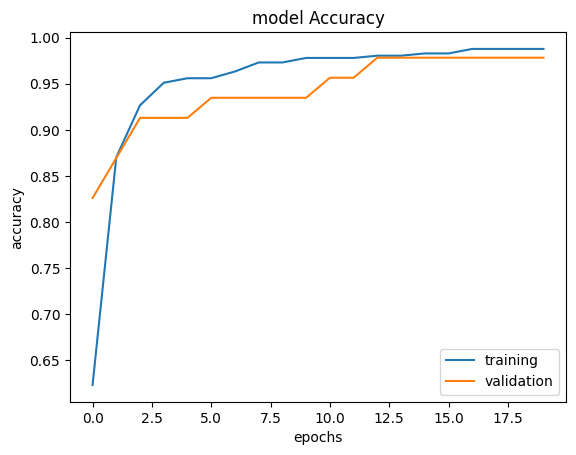

In [25]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training','validation'], loc='lower right')

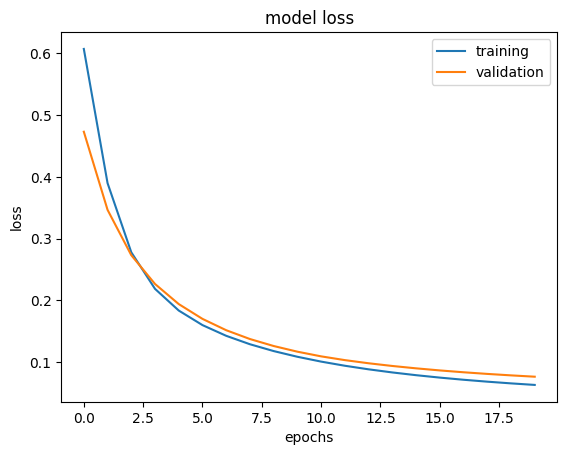

In [26]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'], loc='upper right')

Accuracy on test data

In [27]:
loss,accuracy=model.evaluate(x_test,y_test)
accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9627 - loss: 0.0882 


0.9561403393745422

In [28]:
print(x_test.shape)
print(x_test[0])

(114, 30)
[-0.99455847 -0.05522817 -0.93005495 -0.87063883 -0.03527898  0.14111718
 -0.33690822 -0.59941648  0.33050133  0.21713585  0.13425946 -0.01557434
  0.24077407 -0.29550715  0.08569201  0.50739436  0.01754572  0.24853314
  1.64942557 -0.21818134 -0.90317465 -0.42998447 -0.86001833 -0.7945183
 -0.56289993 -0.06136446 -0.41875294 -0.5697545   0.02503231 -0.50225186]


Predicted Probability of Target classes of first row

In [29]:
y_pred=model.predict(x_test)
print(y_pred.shape)
print(y_pred[0])   #first row
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(114, 2)
[0.04257682 0.77540106]
[[4.25768197e-02 7.75401056e-01]
 [2.86570340e-01 7.08232880e-01]
 [8.36724192e-02 8.30744505e-01]
 [6.32677274e-03 9.66332972e-01]
 [9.72495973e-01 5.07858917e-02]
 [6.71180785e-02 8.50544512e-01]
 [5.39164208e-02 8.55822146e-01]
 [1.57708768e-02 9.69127178e-01]
 [9.82797612e-03 9.71519411e-01]
 [2.72662472e-02 9.20919538e-01]
 [2.14100629e-02 9.10714507e-01]
 [9.10163462e-01 7.23425373e-02]
 [9.16049536e-03 9.54545200e-01]
 [2.66604364e-01 4.91821557e-01]
 [7.18586147e-03 8.74842227e-01]
 [1.19799756e-01 8.39534938e-01]
 [2.63785254e-02 9.11956251e-01]
 [4.69146529e-03 8.94537210e-01]
 [9.95379210e-01 4.12224792e-03]
 [1.50271088e-01 7.96438754e-01]
 [2.87964828e-02 9.45326626e-01]
 [4.99890335e-02 9.31807518e-01]
 [1.06036484e-01 7.70512402e-01]
 [4.96246278e-01 5.76895595e-01]
 [2.43919957e-02 9.70824301e-01]
 [7.57700857e-03 9.60706115e-01]
 [5.02324253e-02 9.04376924e-01]
 [9.98092771e-01 3.71784065e-03]
 [9.9

Finding the the index of max probability into each row

In [30]:
y_pred_index=np.argmax(y_pred,axis=1)
y_pred_index

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1])

In [31]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels

[np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.in

Final Model Building for prediction

In [32]:
input=(17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,23.65,18.9,12.6,29.3,0.29,1.25,7.45,4.39,6.1,0.47)
input_data_as_numpy_array=np.asarray(input)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
input_data_std=scaler.transform(input_data_reshaped)
print(input_data_std)
prediction=model.predict(input_data_reshaped)
print(prediction)
prediction_label=[np.argmax(prediction)]
print(prediction_label)
if prediction_label[0]==0:
  print('its Malignant')
else:
  print('its benigin')

[[ 1.07599638 -2.12554125  1.24163809  0.95925095  1.50150227  3.14631612
   2.5486452   2.45230179  2.07520612  2.10327539 86.13803275 29.62115392
  85.55119752 40.80047152 49.3475432  34.11646031 21.199813   39.86977991
  50.34846956 40.90070929  1.48263149 -1.10447712 -2.77178572 -1.469148
   6.93365246  6.16717664 33.96848866 63.88269777 90.93597025 20.78704128]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1. 0.]]
[np.int64(0)]
its Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
